<a href="https://colab.research.google.com/github/Tecnologias-Emergentes-Equipo2/Proyecto2/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Detección de Sana Distancia Utilizando Yolov4

## 1. Preparación

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ln -s /content/gdrive/MyDrive/Proyecto\ Sana\ Distancia /proyecto
!ls /proyecto

'Proyecto 1'  'Proyecto 2'


In [4]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15320, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 15320 (delta 4), reused 3 (delta 3), pack-reused 15315
Receiving objects: 100% (15320/15320), 13.92 MiB | 19.34 MiB/s, done.
Resolving deltas: 100% (10371/10371), done.


In [5]:
%cd darknet
# Build Yolov4
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!make
# Get weights for Yolov4
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (itera

In [7]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg

CUDA status Error: file: ./src/dark_cuda.c : () : line: 38 : build time: Oct 29 2021 - 04:40:20 

 CUDA Error: no CUDA-capable device is detected
Darknet error location: ./src/dark_cuda.c, check_error, line #69
CUDA Error: no CUDA-capable device is detected: Bad file descriptor


In [ ]:
imShow('predictions.jpg')

Declaración de función auxiliar para mostrar imágenes en la notebook.

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

## 2. Exploración de los Datos

El dataset que se utilizará para entrenar el modelo de YOLO es [Face Mask Detection](https://www.kaggle.com/andrewmvd/face-mask-detection), hecho por [Larxel](https://www.kaggle.com/andrewmvd) en Kaggle.

In [ ]:
import os
import shutil
from tqdm import tqdm
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split

In [ ]:
!cp /proyecto/Data/archive.zip ../
!unzip ../archive.zip -d data/

Archive:  ../archive.zip
  inflating: data/annotations/maksssksksss0.xml  
  inflating: data/annotations/maksssksksss1.xml  
  inflating: data/annotations/maksssksksss10.xml  
  inflating: data/annotations/maksssksksss100.xml  
  inflating: data/annotations/maksssksksss101.xml  
  inflating: data/annotations/maksssksksss102.xml  
  inflating: data/annotations/maksssksksss103.xml  
  inflating: data/annotations/maksssksksss104.xml  
  inflating: data/annotations/maksssksksss105.xml  
  inflating: data/annotations/maksssksksss106.xml  
  inflating: data/annotations/maksssksksss107.xml  
  inflating: data/annotations/maksssksksss108.xml  
  inflating: data/annotations/maksssksksss109.xml  
  inflating: data/annotations/maksssksksss11.xml  
  inflating: data/annotations/maksssksksss110.xml  
  inflating: data/annotations/maksssksksss111.xml  
  inflating: data/annotations/maksssksksss112.xml  
  inflating: data/annotations/maksssksksss113.xml  
  inflating: data/annotations/maksssksksss114

Muestra de una de las imágenes extraídas del dataset.

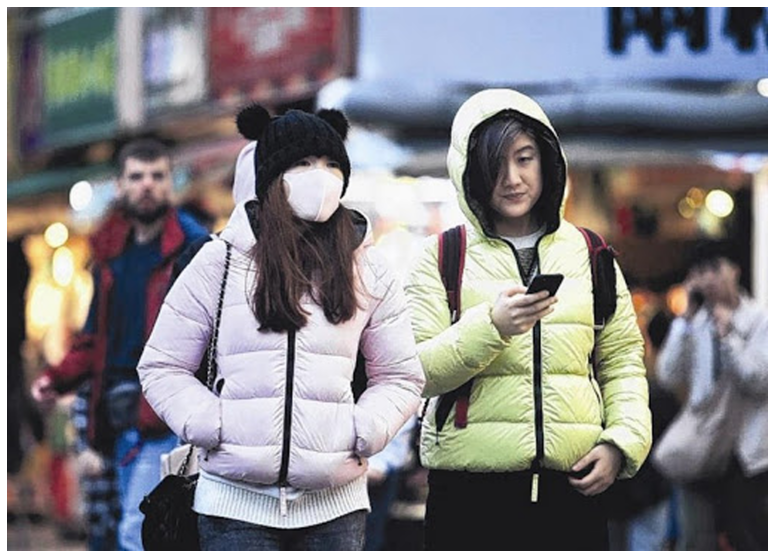

In [ ]:
imShow('data/images/maksssksksss0.png')

Las anotaciones del cada una de las imágenes se encuentra hecha en XML, por lo que necesitarán de limpieza antes de ser utilizadas para entrenar el modelo de YOLO.

In [ ]:
!cat data/annotations/maksssksksss0.xml


<annotation>
    <folder>images</folder>
    <filename>maksssksksss0.png</filename>
    <size>
        <width>512</width>
        <height>366</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>79</xmin>
            <ymin>105</ymin>
            <xmax>109</xmax>
            <ymax>142</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>185</xmin>
            <ymin>100</ymin>
            <xmax>226</xmax>
            <ymax>144</ymax>
        </bndbox>
    </object>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</

Función para extraer de los archivos de xml la información necesaria para crear los labels y bounding boxes. Esta función fue extraída del blog [How to Train YOLO v5 on a Custom Dataset](https://blog.paperspace.com/train-yolov5-custom-data/#convert-the-annotations-into-the-yolo-v5-format), hecho por [Ayoosh Kathuria](https://blog.paperspace.com/author/ayoosh/).

In [ ]:
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

Ejemplo del output esperado al ejecutar la función de ```extract_info_from_xml```.

In [ ]:
%cd data/
print(extract_info_from_xml('annotations/maksssksksss0.xml'))

/content/darknet/data
{'bboxes': [{'class': 'without_mask', 'xmin': 79, 'ymin': 105, 'xmax': 109, 'ymax': 142}, {'class': 'with_mask', 'xmin': 185, 'ymin': 100, 'xmax': 226, 'ymax': 144}, {'class': 'without_mask', 'xmin': 325, 'ymin': 90, 'xmax': 360, 'ymax': 141}], 'filename': 'maksssksksss0.png', 'image_size': (512, 366, 3)}


Este diccionario contiene el mapeo de las categorías dentro del dataset a su equivalente numérico para YOLO.

In [ ]:
id_map = {
  'with_mask' : 0,
  'without_mask' : 1,
  'mask_weared_incorrect' : 2
}

La siguiente función convierte los valores recibidos por la función anterior al formato de YOLO. Al igual que ```extract_info_from_xml```, esta función fue extraída del blog **How to Train YOLO v5 on a Custom Dataset**.

In [ ]:
# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = id_map[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", id_map.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("annotations", info_dict["filename"].replace("png", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [ ]:
# Extracción
anotaciones = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "xml"]
anotaciones.sort()

# Conversión
for anotacion in tqdm(anotaciones):
    info_dict = extract_info_from_xml(anotacion)
    convert_to_yolov5(info_dict)
anotaciones = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "txt"]

100%|██████████| 853/853 [00:00<00:00, 2951.22it/s]


Después del procesamiento, se generaron archivos txt que contienen la misma información de sus equivalentes xml pero en el formato correcto de YOLO.

In [ ]:
!cat annotations/maksssksksss0.txt

1 0.184 0.337 0.059 0.101
0 0.401 0.333 0.080 0.120
1 0.669 0.316 0.068 0.139


In [ ]:
# Lectura de los nombres de los archivos
images = [os.path.join('images', x) for x in os.listdir('images')]
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Partición del dataset para entrenamiento, validación y pruebas
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

# Creación de las carpetas a donde se moverán los archivos
!mkdir images/train images/val images/test annotations/train annotations/val annotations/test

# Función para mover los archivos a su destino
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'annotations/train/')
move_files_to_folder(val_annotations, 'annotations/val/')
move_files_to_folder(test_annotations, 'annotations/test/')

# Cambio de nombre de la carpeta de annotations a labels
!mv annotations labels

In [ ]:
%cd ..

/content/darknet


### 3. Entrenamiento

Se mueve el archivo de configuración de YOLOv4 al drive para modificarse su código.

In [ ]:
!cp cfg/yolov4-custom.cfg /proyecto/yolov4-obj.cfg

Posteriormente, el archivo customizado se regresa a la carpeta de cfg dentro de darknet.

Las modificaciones realizadas al archivo original de ```yolo-custom.cfg``` fueron las siguientes:
 - ```max_batches = 6000```
 - ```steps = 4800,5400```
 - ```filters = 24``` (En las primeras 3 convolutional layers)

In [ ]:
!cp /proyecto/yolov4-obj.cfg ./cfg

Se mueven a la carpeta de data los archivos de obj.names y obj.data

En obj.names el archivo se ve de la siguiente manera:

```
with_mask
without_mask
mask_weared_incorrect
```

En obj.data la configuración fue la siguiente:

```
classes = 3
train = data/train.txt
valid = data/valid.txt
names = data/obj.names
backup = /proyecto/backup
```

In [ ]:
!cp /proyecto/obj.names ./data
!cp /proyecto/obj.data ./data